# Appendix A. Integration

# Composite Numerical Integration

Although above-described methods are good enough when we want to integrate along small intervals, larger intervals would require more sampling points, where the resulting Lagrange interpolant will be a high-order polynomial. These interpolant polynomials exihibit usually an oscillatory behaviour (best known as [Runge's phenomenon](http://en.wikipedia.org/wiki/Runge%27s_phenomenon)), being more inaccurate as we increase $n$.

An elegant and computationally inexpensive solution to this problem is a *piecewise* approach, where low-order Newton-Cotes formula (like trapezoidal and Simpson's rules) are applied over subdivided intervals. This methods are already implemented in the previous `scipy` trapezoidal and Simpsons implementations. An internal implementation is given in the [Appendix of integration](./numerical-calculus-integration-appendix.ipynb)

In [16]:
#Composite Quadrature method
def CompositeQuadrature( f, a, b, N, n, xmin, xmax, ymin=0, ymax=1 ):
    #X array
    X = np.linspace( a, b, N )
    
    #Plotting
    fig = plt.figure( figsize = (8,8) )
    for i in xrange(0,N-n,n):
        Xi = X[i:i+n+1]
        ax = Quadrature( f, Xi, X[i], X[i+n], fig=fig, leg=False )
    
    #X array
    Xarray = np.linspace( xmin, xmax, 1000 )
    #F array
    Yarray = f( Xarray )
    #Function
    ax.plot( Xarray, Yarray, linewidth = 3, color = "blue", label="$f(x)$", zorder=0 )
    
    #Format
    plt.xlim( (xmin, xmax) )
    plt.ylim( (ymin, ymax) )
    
    return None

## Composite trapezoidal rule

This formula is obtained when we subdivide the integration interval $[a,b]$ within sets of two points, such that we can apply the previous Trapezoidal rule to each one.

Let $f(x)$ be a well behaved function ($f\in C^2[a,b]$), defining the interval space as $h = (b-a)/N$, where N is the number of intervals we take, the **Composite Trapezoidal rule** is given by:

$$ \int_a^b f(x) dx = \frac{h}{2}\left[ f(a) + 2\sum_{j=1}^{N-1}f(x_j) + f(b) \right] - \frac{b-a}{12}h^2 f^{''}(\mu)$$

for some value $\mu$ in $(a,b)$.

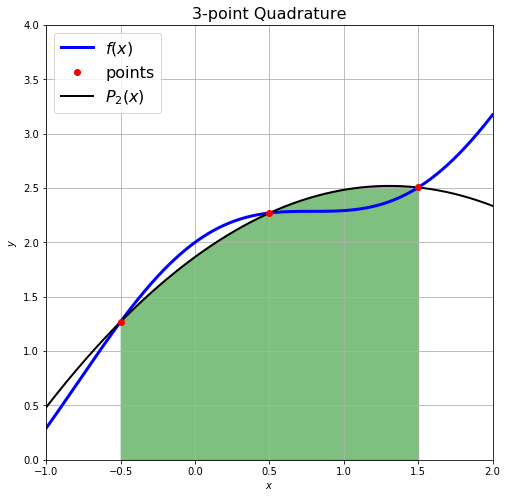

In [76]:
#Function
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with 3 points (Simpson's rule)
X = np.array([-0.5,0.5,1.5])
Ln=Quadrature( f, X, xmin=-1, xmax=2, ymin=0, ymax=4 )

## Composite Simpson's rule

Now, if we instead divide the integration interval in sets of three points, we can apply Simpson's rule to each one, obtaining:

$$ \int_a^bf(x)dx = \frac{h}{3}\left[ f(a) +2 \sum_{j=1}^{(n/2)-1}f(x_{2j})+4\sum_{j=1}^{n/2}f(x_{2j-1})+f(b) \right] - \frac{b-a}{180}h^4f^{(4)}(\mu)$$

for some value $\mu$ in $(a,b)$.

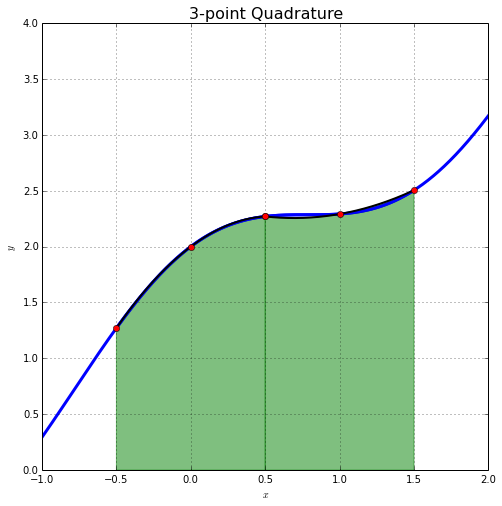

In [186]:
#Function
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with 3 points (Simpson's rule)
CompositeQuadrature( f, a=-0.5, b=1.5, N=5, n=2, xmin=-1, xmax=2, ymin=0, ymax=4 )

## <font color='red'>     **Activity** </font>

<font color='red'>   
- Using the Composite trapezoidal and Simpson's rules, determine the value of the integral (4.24565)

$$ \int_{-0.5}^{1.5}(1+\cos^2x + x)dx $$

- Take the previous routine CompositeQuadrature and the above function and explore high-order composites quadratures. What happens when you increase the number of points?
</font>

## <font color='red'>     **Activity** </font>

<font color='red'>    

An experiment has measured $dN(t)/dt$, the number of particles entering a counter, per unit time, as a function of time. Your problem is to integrate this spectrum to obtain the number of particles $N(1)$ that entered the counter
in the first second

$$ N(1) = \int_0^1 \frac{dN}{dt} dt$$

For the problem it is assumed exponential decay so that there actually is an analytic answer. 

$$ \frac{dN}{dt} = e^{-t} $$

Compare the relative error for the composite trapezoid and Simpson rules. Try different values of N. Make a logarithmic plot of N vs Error.

- - -

# Adaptive Quadrature Methods

Calculating the integrate of the function $f(x) = e^{-3x}\sin(4x)$ within the interval $[0,4]$, we obtain:

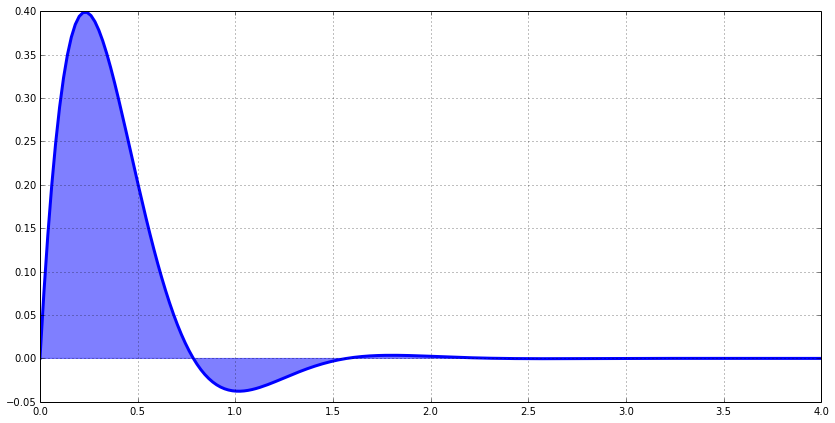

In [13]:
#Function
def f(x):
    return np.exp(-3*x)*np.sin(4*x)

#Plotting
X = np.linspace( 0, 4, 200 )
Y = f(X)
plt.figure( figsize=(14,7) )
plt.plot( X, Y, color="blue", lw=3 )
plt.fill_between( X, Y, color="blue", alpha=0.5 )
plt.xlim( 0,4 )
plt.grid()

Using composite numerical integration is not completely adequate for this problem as the function exhibits different behaviours for differente intervals. For the interval $[0,2]$ the function varies noticeably, requiring a rather small integration interval $h$. However, for the interval $[2,4]$ variations are not considerable and low-order composite integration is enough. This lays a pathological situation where simple composite methods are not efficient. In order to remedy this, we introduce an adaptive quadrature methods, where the integration step $h$ can vary according to the interval. The main advantage of this is a controlable precision of the result.

## Simpson's adaptive quadrature

Although adaptive quadrature can be readily applied to any quadrature method, we shall cover only the Simpson's adaptive quadrature as it is more than enough for most problems.

Let's assume a function $f(x)$. We want to compute the integral within the interval $[a,b]$. Using a simple Simpson's quadrature, we obtain:

$$\int_a^bf(x)dx = S(a,b) - \frac{h^5}{90}f^{(4)}(\xi)$$

where we introduce the notation:

$$S(a,b) = \frac{h}{3}\left[ f(a) + 4f(a+h) + f(b) \right]$$

and $h$ is simply $h = (b-a)/2$.

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/bb0f137366b3d2bbfdd33425ad78be4003716703/material/figures/adaptive_quadrature.png)

Now, instead of using an unique Simpson's quadrature, we implement two, yielding:

$$\int_a^bf(x)dx = S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) - \frac{1}{16}\left(\frac{h^5}{90}\right)f^{(4)}(\xi)$$

For this expression, we reasonably assume an equal fourth-order derivative $f^{(4)}(\xi) = f^{(4)}(\xi_1) = f^{(4)}(\xi_2) $, where $\xi_1$ is the estimative for the first subtinterval (i.e. $\xi_1\in[a,(a+b)/2]$), and $\xi_2$ for the second one (i.e. $\xi_1\in[(a+b)/2, b]$).

As both expressions can approximate the real value of the integrate, we can equal them, obtaining:

$$
\int_a^bf(x)dx\begin{cases} \sim S(a,b) - \frac{h^5}{90}f^{(4)}(\xi) \\
\approx S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) - \frac{1}{16}\left(\frac{h^5}{90}\right)f^{(4)}(\xi)
\end{cases}
$$

which leads us to a simple way to estimate the error without knowing the fourth-order derivative, i.e.

$$\frac{h^5}{90}f^{(4)}(\xi) \sim \frac{16}{15}\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|$$

If we fix a precision $\epsilon$, such that the obtained error for the second iteration is smaller

$$\frac{1}{16}\frac{h^5}{90}f^{(4)}(\xi) < \epsilon $$

it implies:

$$\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|< 15 \epsilon$$

and 

$$\left| \int_a^bf(x) dx- S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|< \epsilon$$

The second iteration is then $15$ times more precise than the first one.

## Steps Simpson's adaptive quadrature

**1.** Give the function $f(x)$ to be integrated, the inverval $[a,b]$ and set a desired precision $\epsilon$.

**2.** Compute the next Simpsons's quadratures:

$$ S(a,b),\ S\left(a,\frac{a+b}{2}\right),\ S\left(\frac{a+b}{2},b\right) $$

**3.** If 

$$\frac{1}{15}\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|<\epsilon$$

then the integration is ready and is given by:

$$\int_a^bf(x) dx \approx S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) $$

within the given precision.

**4.** If the previous step is not fulfilled, repeat from step **2** using as new intervals $[a,(a+b)/2]$ and $[(a+b)/2,b]$ and a new precision $\epsilon_1 = \epsilon/2$. Repeating until step 3 is fulfilled for all the subintervals.

## <font color='red'>     **Activity** </font>

<font color='red'>   
- By using the `quad` function of `scipy.integrate`  which use an adaptive quadrature algorithm, calculate the value of the next integral with a precision of float32.

$$\int_0^4 e^{-3x}\sin(4x)dx$$


## <font color='red'>     **Activity** </font>

<font color='red'>   
Fresnel integrals are commonly used in the study of light difraction at a rectangular aperture, they are given by:

$$c(t) = \int_0^t\cos\left(\frac{\pi}{2}\omega^2\right)d\omega$$

$$s(t) = \int_0^t\sin\left(\frac{\pi}{2}\omega^2\right)d\omega$$

These integrals cannot be solved using analitical methods. Using the previous routine for adaptive quadrature, compute the integrals with a precision of $\epsilon=10^{-4}$ for values of $t=0.1,0.2,0.3,\cdots 1.0$. Create two arrays with those values and then make a plot of $c(t)$ vs $s(t)$. The resulting figure is called Euler spiral, that is a member of a family of curves called [Clothoid loops](http://en.wikipedia.org/wiki/Vertical_loop).


## <font color='red'>     **Activity** </font>

### Models of Universe

From the Friedmann equations can be found the dynamics of the Universe, i.e., the evolution of the expansion with time that depends on the content of matter and energy of the Universe. Before introducing the general expression, there are several quatities that need to be defined. 

It is convenient to express the density in terms of a critical density $\rho_c$ given by

\begin{equation}
\rho_c = 3H_0^2/8\pi G
\end{equation}

where $H_o$ is the Hubble constant. The critical density is the density needed in order the Universe to be flat. To obtained it, it is neccesary to make the curvature of the universe $\kappa = 0$. The critical density is one value per
time and the geometry of the universe depends on this value, or equally on $\kappa$. For a universe with $\kappa<0$ it would ocurre a big crunch(closed universe) and for a $\kappa>0$ there would be an open universe.    

Now, it can also be defined a density parameter, $\Omega$, a normalized density

\begin{equation}
\Omega_{i,0} = \rho_{i,0}/\rho_{c}
\end{equation}

where $\rho_{i,0}$ is the actual density($z=0$) for the component $i$. Then, it can be found the next expression 

\begin{equation}
\frac{H^2(t)}{H_{0}^{2}} = (1-\Omega_0)(1+z)^2 + \Omega_{m,0}(1+z^3)+ \Omega_{r,0}(1+z)^4 + \Omega_{\Lambda,0}
\end{equation}

where $\Omega_{m,0}$, $\Omega_{r,0}$ and  $\Omega_{\Lambda,0}$ are the matter, radiation and vacuum density parameters. And $\Omega_0$ is the total density including the vacuum energy. 

This expression can also be written in terms of the expansion or scale factor, $a$, rather than the redshift, $z$, due to the expression: $1+z = 1/a$, and it can be simplified in several ways. 

For the next universe models, plot time($H_{0}^{-1}$ units) vs the scale factor:

-Einstein-de Sitter Universe: Flat space, null vacuum energy and dominated by matter

\begin{equation}
t = H_0^{-1} \int_0^{a'} a^{1/2}da
\end{equation}
 
-Radiation dominated universe: All other components are not contributing 

$$
t = H_0^{-1} \int_0^{a'} \frac{a}{[\Omega_{r,0}+a^2(1-\Omega_{r,0})]^{1/2}}da
$$

-WMAP9 Universe 

\begin{equation}
t = H_0^{-1} \int_0^{a'} \left[(1-\Omega_{0})+ \Omega_{m,0}a^{-1} + \Omega_{r,0}a^{-2} +\Omega_{\Lambda,0}a^2\right]^{-1/2} da
\end{equation}


You can take the cosmological parameters  from the link 

http://lambda.gsfc.nasa.gov/product/map/dr5/params/lcdm_wmap9.cfm or use these ones: $\Omega_M$ = 0.266,
$\Omega_R = 8.24e-5$ and $\Omega_L = 0.734$. 

Use composite simpson rule to integrate and compare it with the analitical expression in case you can get it. 
The superior limit in the integral corresponds to the actual redshift $z=0$. What is happening to our universe? 



- - -

# Improper Integrals

Although the previous integration methods can be applied in almost every situation, improper integrals pose a challenger to numerical methods as they involve indeterminations and infinite intervals. Next, we shall cover some tricks to rewrite improper integrals in terms of simple ones.

## Left endpoint singularity

Assuming a function $f(x)$ such that it can be rewritten as

$$ f(x) = \frac{g(x)}{(x-a)^p} $$

the integral over an interval $[a,b]$ converges only and only if $0<p<1$.

Using Simpson's composite rule, it is possible to compute the fourth-order Taylor polynomial of the function $g(x)$ at the point $a$, obtaining

$$ P_4(x) = g(a) + g^{'}(a)(x-a)+\frac{g^{''}(a)}{2!}(x-a)^2 +\frac{g^{''}(a)}{3!}(x-a)^3+ \frac{g^{(4)}(a)}{4!}(x-a)^4$$

The integral can be then calculated as

$$\int_a^b f(x)dx = \int_a^b\frac{g(x)-P_4(x)}{(x-a)^p}dx + \int_a^b\frac{P_4(x)}{(x-a)^p}dx$$

The second term is an integral of a polynimal, which can be easily integrated using analytical methods.

The first term is no longer pathologic as there is not any indetermination, and it can be determined using composite Simpson's rule

## Right endpoint singularity

This is the contrary case, where the indetermination is present in the extreme $b$ of the integration interval $[a,b]$. For this problem is enough to make a variable substitution

$$ z=-x \  \ \ \ \ \  dz=-dx$$

With this, the right endpoint singularity becomes a left endpoint singularity and the previous method can be directly applied.

## Infinite singularity

Finally, infinite singularities are those where the integration domain is infinite, i.e.

$$\int_a^\infty f(x)dx$$

this type of integrals can be easily turned into a left endpoint singularity jus making the next variable substitution

$$t = x^{-1}\ \ \ \ \ dt = -x^{-2}dx$$

yielding

$$ \int_a^\infty f(x)dx = \int_0^{1/a}t^{-2}f\left(\frac{1}{t}\right)dt $$

## <font color='red'>     **Activity** </font>

<font color='red'>   
Error function is a special and non-elementary function that is widely used in probability, statistics and diffussion processes.
It is defined through the integral:

$$\mbox{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}dt$$

Using the substitution $u=t^2$ it is possible to use the previous methods for impropers integrals in order to evaluate the error function. Create a routine called `ErrorFunction` that, given a value of $x$, return the respective value of the integral.


- - -